# Experiment 3
---------------
Try to create a custom model based on fruit paper

In [1]:
%run ./prepare_dataset.ipynb

System version
 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


Using TensorFlow backend.



Your Device List:
 [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1215834140663344552
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6700198133
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17855086966375966921
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
img_width, img_height, img_size, batch_size =  prepareConstants(100 ,100,100,16)
train_data_dir, validation_data_dir = setDirs()
train_generator, validation_generator = prepareDatasets(train_data_dir,validation_data_dir,img_width,img_height,batch_size)
checkData(train_generator,validation_generator)


Image Width: 100
Image Height: 100
Image Size: 100
Batch Size: 16

Train dir: ../fruits-360/Training/
Test dir: ../fruits-360/Test/

Import Trainingset
Found 53177 images belonging to 103 classes.

Import Validationset
Found 17845 images belonging to 103 classes.

Train Samples:  53177
Train Classes: 103
Class Indexes:
 {'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Cactus fruit': 19, 'Cantaloupe 1': 20, 'Cantaloupe 2': 21, 'Carambula': 22, 'Cherry 1': 23, 'Cherry 2': 24, 'Cherry Rainier': 25, 'Cherry Wax Black': 26, 'Cherry Wax Red': 27, 'Cherry Wax Yellow': 28, 'Chestnut': 29, 'Clementine': 30, 'Cocos': 31, 'Dates': 32, 'Granadilla': 33,

(53177, 103, 17845, 103)

In [5]:
model = models.Sequential()

#Create the network
model.add(layers.Conv2D(4, (5, 5), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(103, activation='softmax'))


#Create early stop callback
# earlystop = EarlyStopping(monitor='loss', min_delta=0.0001, patience=5, \
#                           verbose=1, mode='auto')
# callbacks_list = [earlystop]

#Compile the model
model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 96, 96, 4)         304       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 4)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 16)        1616      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 32)        12832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 64)          51264     
__________

### Train the Model

In [32]:
print(train_generator.samples/train_generator.batch_size)
print(validation_generator.samples/validation_generator.batch_size)

3323.5625
1115.3125


In [ ]:
# with tf.device("/device:GPU:0"):
#     # Train the model
#     history = model.fit_generator(
#           train_generator,
#           steps_per_epoch=train_generator.samples/train_generator.batch_size ,
#           steps_per_epoch = 60,
#           epochs=20,
#           validation_data=validation_generator,
#           validation_steps=validation_generator.samples/validation_generator.batch_size,
#           verbose=0)

start_time = time.time()

with tf.device("/device:GPU:0"):
    history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples,
    epochs=5, shuffle = True, verbose = 0, 
    validation_data = validation_generator,
    validation_steps = validation_generator.samples
    ) 

    
print("\nTraining completed")

elapsed_time = time.time() - start_time
print("Time:",elapsed_time) 


In [7]:
print("Validation Accuracy max:",history.history['val_acc'][-1])
print("Validation Loss max:",history.history['val_loss'][-1])
print("Training Accuracy max:",history.history['acc'][-1])
print("Training Loss max:",history.history['loss'][-1])


Validation Accuracy max: 0.9247408237601569
Validation Loss max: 0.323432678943311
Training Accuracy max: 0.964025800629212
Training Loss max: 0.11182551736345149


In [ ]:
# with tf.device("/device:GPU:0"):
#     #Evaluate the test set
#     history_evaluation = model.evaluate(validation_generator, validation_generator.labels)

# print("\nEvaluation completed")

### Validate the results

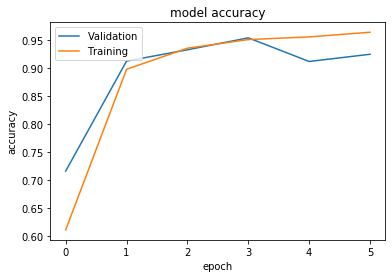

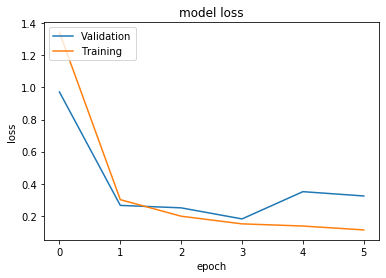

In [8]:
# summarize history for accuracy
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Validation','Training'],loc = 'upper left')
plt.savefig('../plots/exp3_p1_acc.png')
plt.show()


# summarize history for loss
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Validation','Training'],loc = 'upper left')
plt.savefig('../plots/exp3_p1_loss.png')
plt.show()


### Save the model

In [ ]:
saveKerasModel(model,"customPaper")
saveStandardModel(inception_transfer,"customPaper")

In [ ]:
errors = seeErrors(validation_data_dir,validation_generator,model)